In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Dense
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv("/content/Crop_recommendation.csv")
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [ ]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [ ]:
df['label'].value_counts()

,count
label,
rice,100
maize,100
jute,100
cotton,100
coconut,100
papaya,100
orange,100
apple,100
muskmelon,100


In [ ]:
df.isnull().sum()

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
label_encoder = LabelEncoder()
df['target'] = label_encoder.fit_transform(df['label'])

df['target'].head()

,target
0,20
1,20
2,20
3,20
4,20


In [ ]:
print(set(zip(df['label'], df['target'])))

{('lentil', 10), ('banana', 1), ('papaya', 17), ('pigeonpeas', 18), ('mango', 12), ('coffee', 5), ('chickpea', 3), ('mothbeans', 13), ('rice', 20), ('watermelon', 21), ('blackgram', 2), ('apple', 0), ('orange', 16), ('muskmelon', 15), ('kidneybeans', 9), ('pomegranate', 19), ('cotton', 6), ('jute', 8), ('grapes', 7), ('coconut', 4), ('maize', 11), ('mungbean', 14)}


In [ ]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['target']

In [ ]:
scaler = StandardScaler()
features = scaler.fit_transform(features)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

In [ ]:
model = Sequential()

model.add(Dense(11, activation='relu', input_dim=x_train.shape[1]))
model.add(Dense(44, activation='relu'))
model.add(Dense(33, activation='relu'))
model.add(Dense(22, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Using sparse categorical crossentropy for integer labels
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=80, batch_size=24, validation_data=(x_test, y_test))

Epoch 1/80
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0999 - loss: 3.0036 - val_accuracy: 0.2318 - val_loss: 2.7002
Epoch 2/80
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2843 - loss: 2.5369 - val_accuracy: 0.4212 - val_loss: 2.0371
Epoch 3/80
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5488 - loss: 1.7541 - val_accuracy: 0.7106 - val_loss: 1.2467
Epoch 4/80
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7239 - loss: 1.1129 - val_accuracy: 0.7697 - val_loss: 0.8536
Epoch 5/80
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8103 - loss: 0.7714 - val_accuracy: 0.8470 - val_loss: 0.6077
Epoch 6/80
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8606 - loss: 0.5665 - val_accuracy: 0.8788 - val_loss: 0.4801
Epoch 7/80
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8887 - loss: 0.4421 - val_accuracy: 0.8803 - val_loss: 0.4140
Epoch 8/80
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8976 - loss: 0.3632 - val_accuracy: 0.8985 - val_loss:

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9717 - loss: 0.0802 
Test accuracy: 0.978787899017334


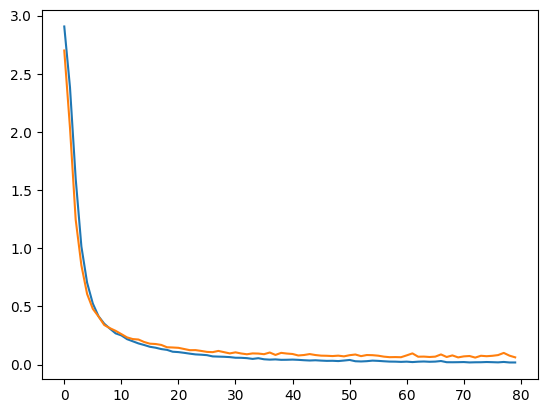

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.show()

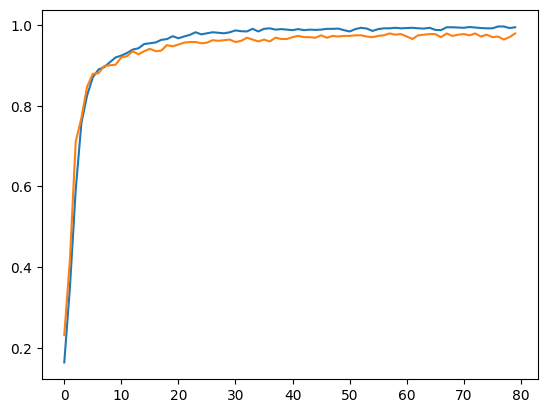

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.show()

In [ ]:
predictions = model.predict(x_test)

predicted_classes = predictions.argmax(axis=1)

predicted_crop_labels = label_encoder.inverse_transform(predicted_classes)

print(predicted_crop_labels)

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
['muskmelon' 'watermelon' 'papaya' 'papaya' 'apple' 'mango' 'apple'
 'mothbeans' 'mungbean' 'lentil' 'blackgram' 'coconut' 'pomegranate'
 'jute' 'coconut' 'pomegranate' 'apple' 'maize' 'papaya' 'muskmelon'
 'coffee' 'papaya' 'orange' 'papaya' 'chickpea' 'jute' 'mungbean' 'orange'
 'pigeonpeas' 'rice' 'pomegranate' 'lentil' 'jute' 'lentil' 'jute'
 'blackgram' 'jute' 'chickpea' 'chickpea' 'kidneybeans' 'papaya' 'mango'
 'blackgram' 'maize' 'mungbean' 'maize' 'pigeonpeas' 'coconut' 'muskmelon'
 'maize' 'blackgram' 'coffee' 'grapes' 'mungbean' 'coffee' 'kidneybeans'
 'cotton' 'apple' 'banana' 'lentil' 'watermelon' 'coconut' 'lentil'
 'orange' 'papaya' 'blackgram' 'orange' 'rice' 'muskmelon' 'pigeonpeas'
 'muskmelon' 'coconut' 'rice' 'banana' 'blackgram' 'papaya' 'banana'
 'cotton' 'watermelon' 'orange' 'coffee' 'chickpea' 'rice' 'mothbeans'
 'orange' 'mango' 'coffee' 'mothbeans' 'blackgram' 'pomegranate' 'maize'
 'mothbeans' 'cotton' 'papaya' 'pigeon

In [ ]:
model.save('crop_recommendation_model.keras')

In [ ]:
!pip install tensorflowjs

In [ ]:
import tensorflowjs as tfjs
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('crop_recommendation_model.keras')

# Convert the model to TensorFlow.js format
tfjs.converters.save_keras_model(model, 'model-tfjs')

failed to lookup keras version from the file,
    this is likely a weight only file


In [ ]:
predict = model.predict(np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]]))
predicted_class = predict.argmax(axis=1)

predicted_crop_label = label_encoder.inverse_transform(predicted_class)

print(predicted_crop_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
['banana']


In [ ]:
predict

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.]], dtype=float32)